In [47]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)
import warnings
warnings.filterwarnings("ignore")


# Quiz 2 - Get Hyp'

<ul>
<li> Use this as a starting point for your work, but answer the questions on Moodle. 
<li> Publish this to your GitHub and submit the link in the question on Moodle. 
</ul>

## Potentially Useful Information

#### Data Dictionary
<ul>
<li>credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
<li>purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
<li>int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
<li>installment: The monthly installments owed by the borrower if the loan is funded.
<li>log.annual.inc: The natural log of the self-reported annual income of the borrower.
<li>dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
<li>fico: The FICO credit score of the borrower.
<li>days.with.cr.line: The number of days the borrower has had a credit line.
<li>revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
<li>revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
<li>inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
<li>not.fully.paid: 1 if the borrower failed to repay their loan, 0 if they have not failed
</ul>

#### FICO Score Groups

![FICO](fico_range.png "FICO Ranges")

#### Note on ANOVA - Might be Useful, Might Not

> @JeremyMiles is right. First, there's a rule of thumb that the ANOVA is robust to heterogeneity of variance so long as the largest variance is not more than 4 times the smallest variance. Furthermore, the general effect of heterogeneity of variance is to make the ANOVA less efficient. That is, you would have lower power. Since you have a significant effect anyway, there is less reason to be concerned here. 
- https://stats.stackexchange.com/questions/56971/alternative-to-one-way-anova-unequal-variance

In [48]:
# Please don't alter this part. 
df = pd.read_csv("loan_data.csv")
df.drop(columns={"delinq.2yrs", "pub.rec"}, inplace=True)
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,0


### Visualize/Explore Data - If You Want, You Do You

In [49]:
paid = df[df["not.fully.paid"] == 0]
npaid = df[df["not.fully.paid"] == 1]

<AxesSubplot:xlabel='fico', ylabel='Density'>

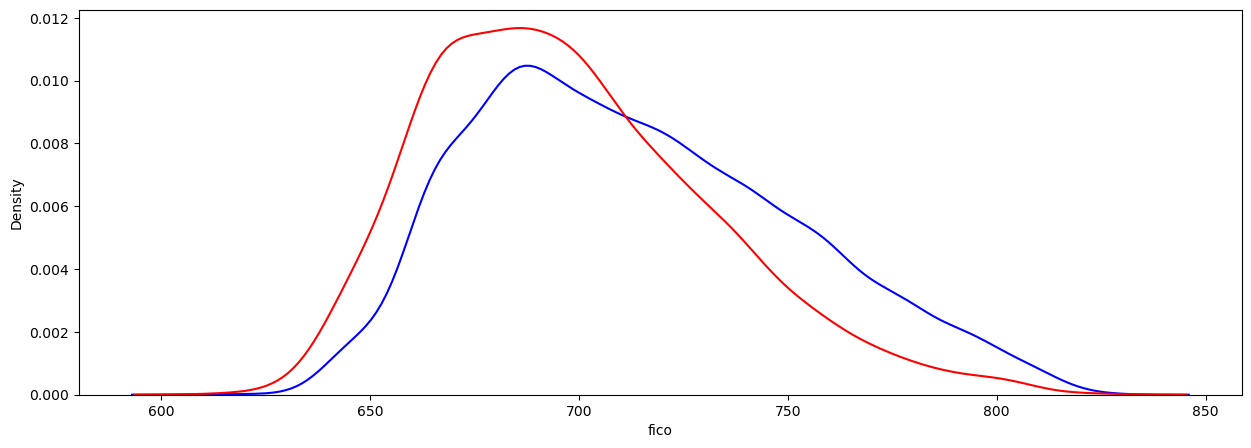

In [50]:
sns.kdeplot(data=paid, x="fico", color = 'blue')
sns.kdeplot(data=npaid, x="fico", color = 'red')

In [51]:
paid_mu, npaid_mu = np.mean(paid["fico"]), np.mean(npaid["fico"])

paid_mu, npaid_mu


(713.3269111249223, 697.8284409654273)

## Solutions

### Question 1 ###

In [52]:
ss.ttest_ind(paid["fico"], npaid["fico"])


Ttest_indResult(statistic=14.812743547869088, pvalue=4.227100096647354e-49)

small p-value. This does not happen by random chance very often at all. So this data shows a significant difference in credit score of people who have paid back their loan and people who have not.

### Question 4 ###

In [53]:
worthy = df[df["credit.policy"] == 1]
notWorthy = df[df["credit.policy"] == 0]

In [54]:
ss.ttest_ind(worthy["fico"], notWorthy["fico"])

Ttest_indResult(statistic=36.36259987408664, pvalue=2.6100416830751396e-271)

### Question 6 - 8 ###

In [55]:
ss.ttest_ind(worthy["log.annual.inc"], notWorthy["log.annual.inc"])


Ttest_indResult(statistic=3.4178817682392073, pvalue=0.0006337324172012597)

Using alpha = 0.05?

In [56]:
from statsmodels.stats.power import TTestPower
powerTest = TTestPower()
ces = thinkstats2.CohenEffectSize(worthy["log.annual.inc"], notWorthy["log.annual.inc"])
alpha = 0.05
nobs = worthy["log.annual.inc"].count() + notWorthy["log.annual.inc"].count()

pow = powerTest.power(effect_size=ces, nobs=nobs, alpha=alpha)

type2error_inc = 1 - pow

pow, type2error_inc

(1.0, 0.0)

Almost 0 chance.

In [57]:
obs_needed85 = powerTest.solve_power(effect_size=ces, nobs=None, alpha=alpha, power=.85)
obs_needed85

1157.6455504974604

### Question 9 ###

In [58]:
np.exp(df["log.annual.inc"].mean())

55944.59683708012

### Question 10 ###

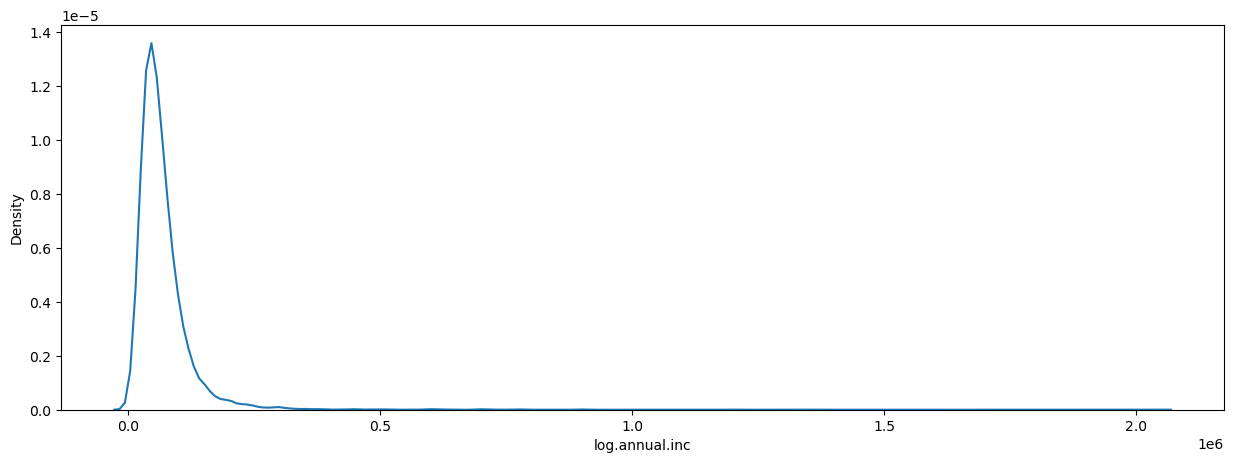

In [59]:
sns.kdeplot(data=np.exp(df["log.annual.inc"]))
plt.show()

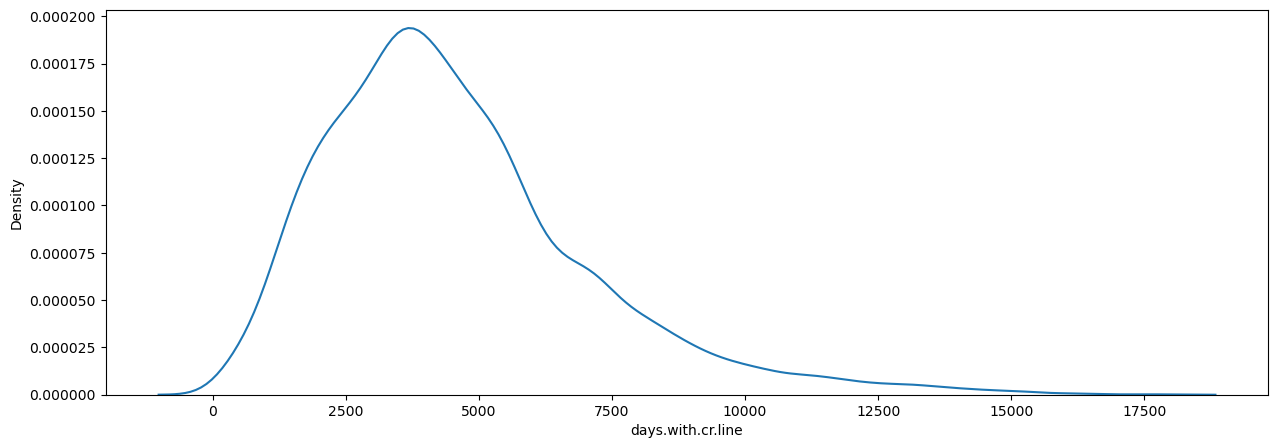

In [60]:
sns.kdeplot(data=df["days.with.cr.line"])
plt.show()

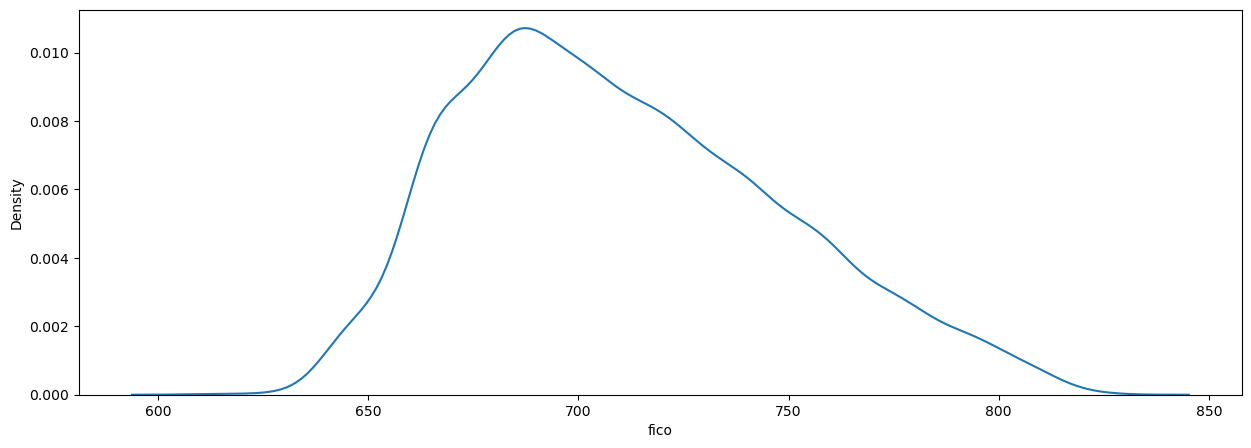

In [61]:
sns.kdeplot(data=df["fico"])
plt.show()

In [62]:
fico_skew = thinkstats2.PearsonMedianSkewness(df["fico"])
inc_skew = thinkstats2.PearsonMedianSkewness(np.exp(df["log.annual.inc"]))
daysCr_skew = thinkstats2.PearsonMedianSkewness(df["days.with.cr.line"])

fico_skew, inc_skew, daysCr_skew


(0.30390788935426843, 0.6210290601166143, 0.5056178217400077)

### Question 12 - 14 ###

Levene test? ANOVA? What does "samples" mean? Credit score bin?

In [99]:
bins = np.array([580, 670, 740, 800])
indicies = np.digitize(df["fico"], bins)
groups = df.groupby(indicies)
for i, group in groups:
    print(i, group["fico"].min(), len(group), np.exp(group["log.annual.inc"]).mean(), len(group)/df.shape[0])

1 612 1341 60231.43210726344 0.14000835247442053
2 672 6007 67593.9549861054 0.6271664230528294
3 742 2085 74025.49061873525 0.21768636458550847
4 802 145 96581.1320305275 0.015138859887241595


In [106]:
fair = groups.get_group(1, np.exp(df["log.annual.inc"]))
good = groups.get_group(2, np.exp(df["log.annual.inc"]))
vgood = groups.get_group(3, np.exp(df["log.annual.inc"]))
exceptional = groups.get_group(4, np.exp(df["log.annual.inc"]))


In [107]:
ss.levene(fair, good, vgood, exceptional)

LeveneResult(statistic=10.46667305452041, pvalue=7.172631377031566e-07)

Really small pvalue. Variances are really different so.... that means each bin is taken from different population?

In [102]:
ss.f_oneway(fair, good, vgood, exceptional)

F_onewayResult(statistic=37.177011948803724, pvalue=7.052161427262523e-24)

In [108]:
expected = [0.16*df.shape[0], 0.17*df.shape[0], 0.21*df.shape[0], 0.25*df.shape[0], 0.21*df.shape[0]]
actual = [0, 1341, 6007, 2085, 145]
ss.chisquare(actual, expected)

Power_divergenceResult(statistic=11292.322336493587, pvalue=0.0)

## Question 16 ##

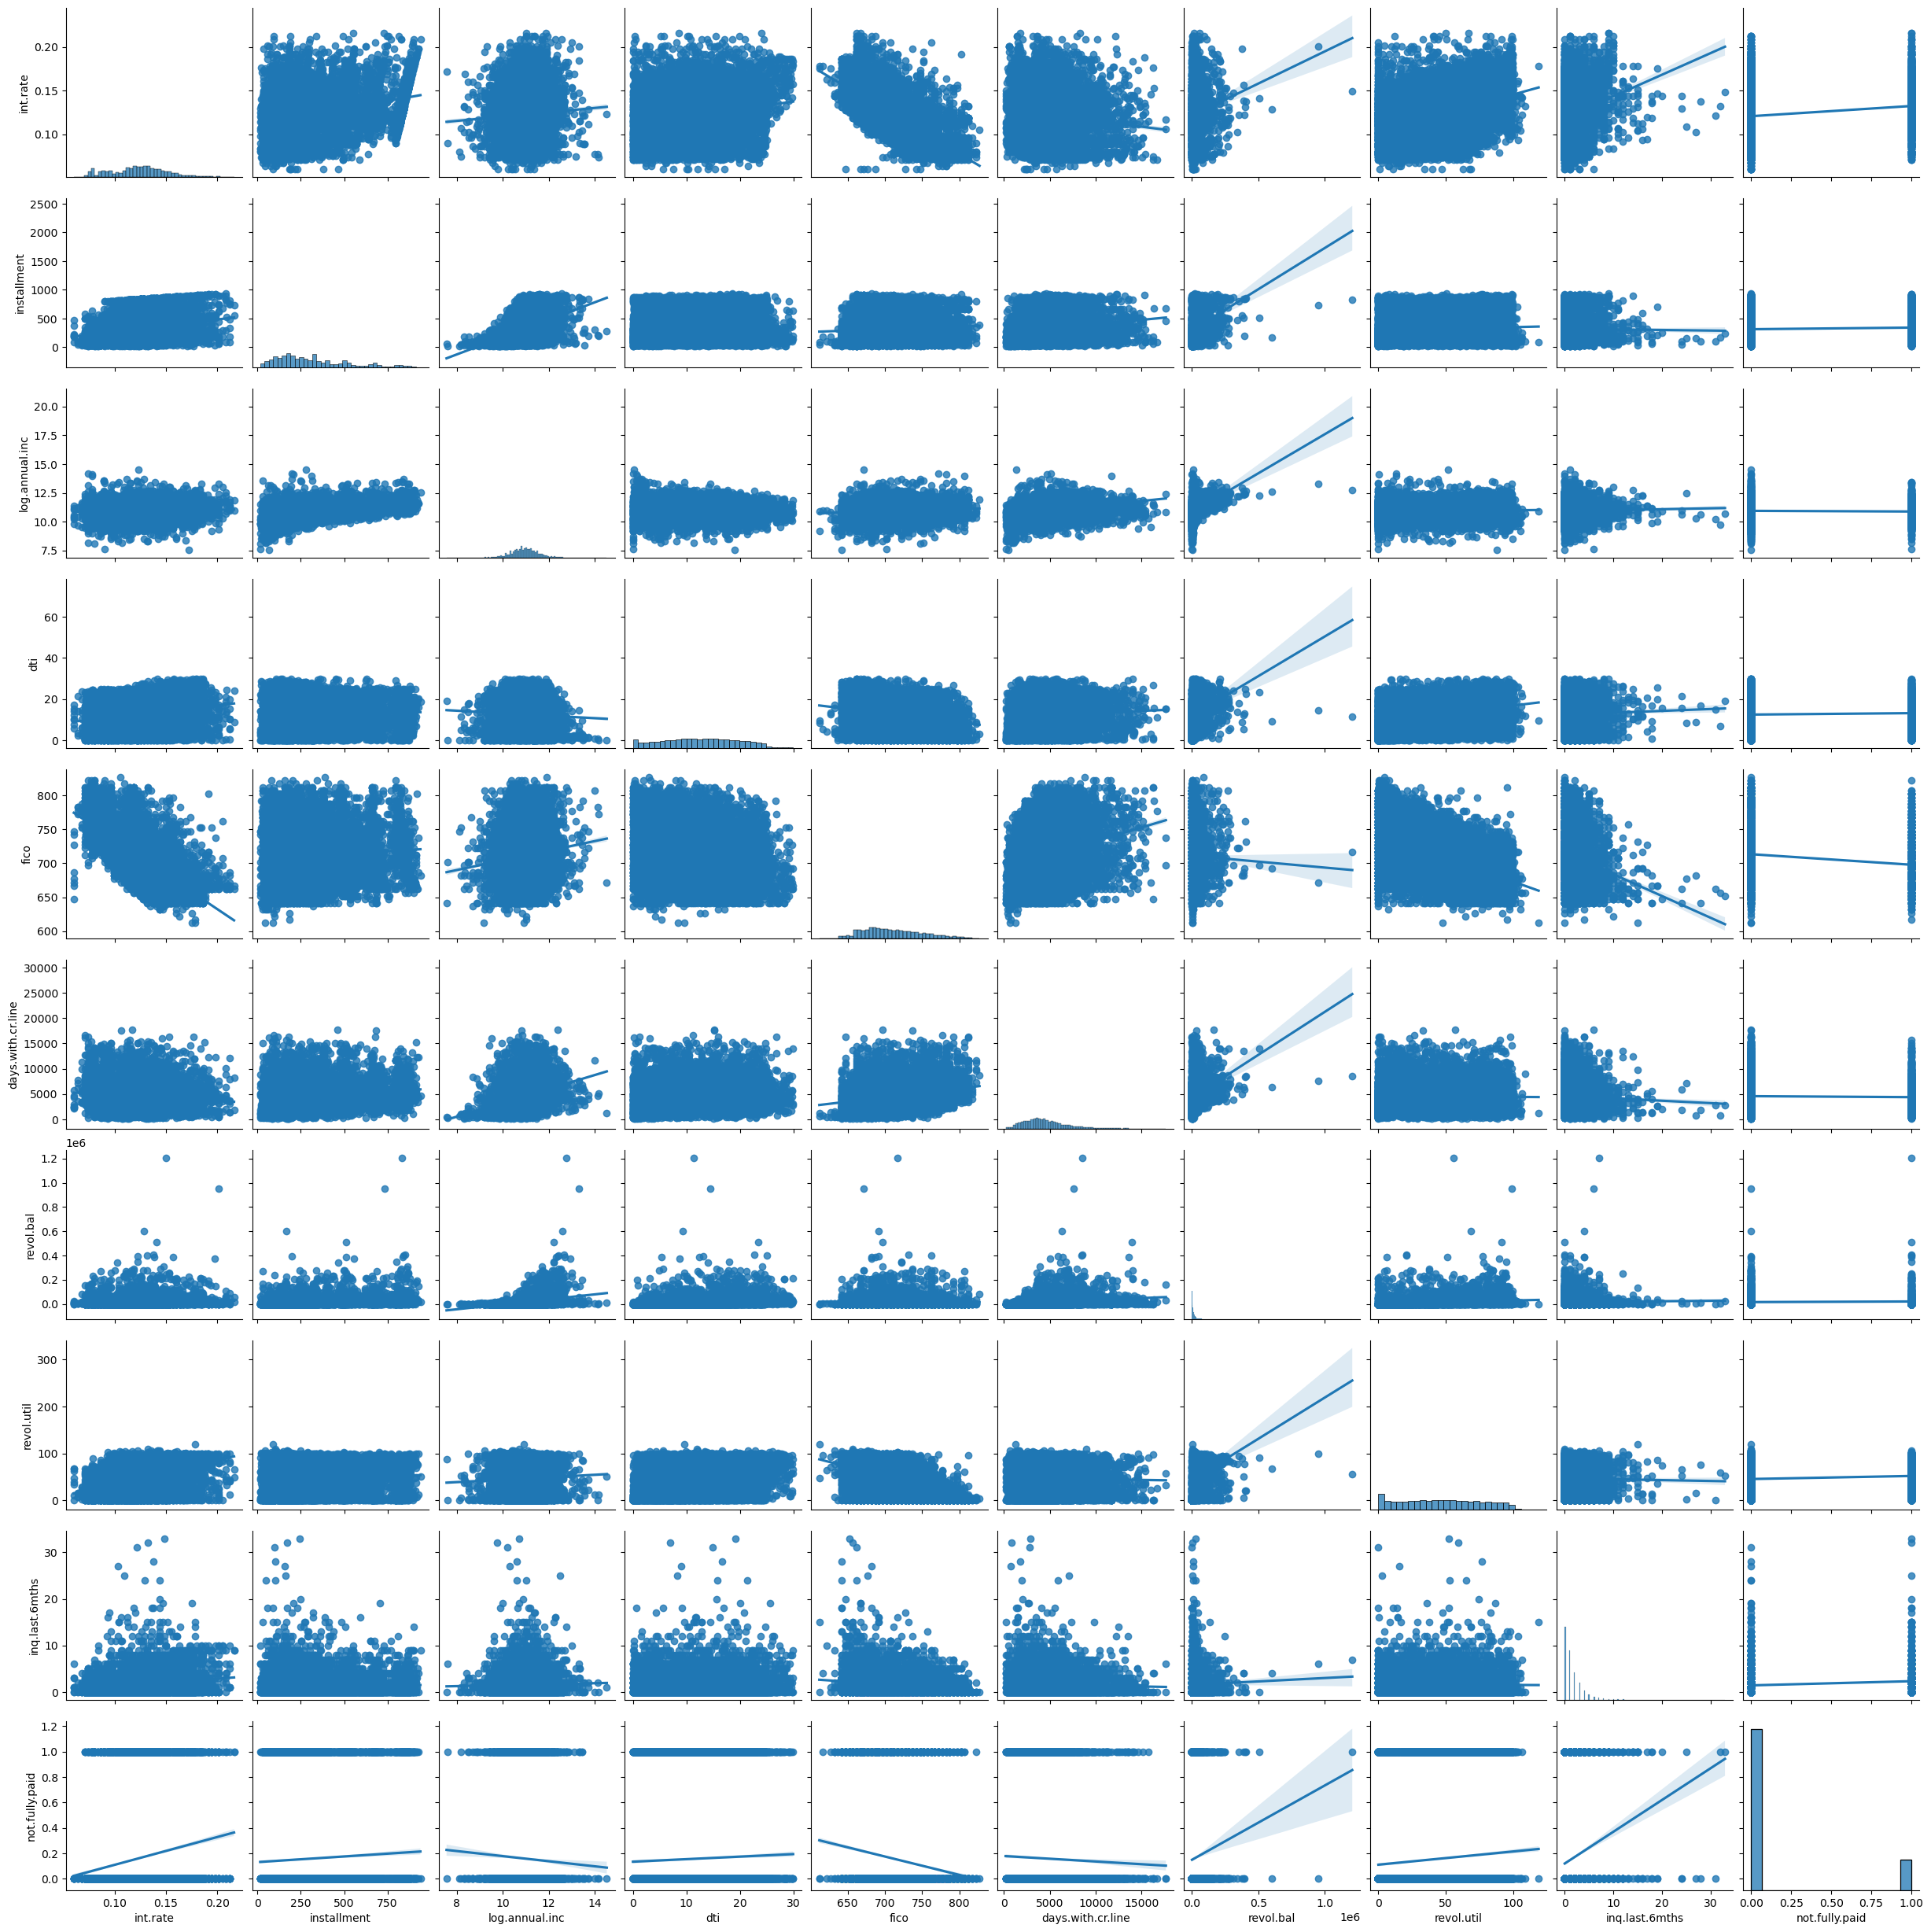

In [95]:
sns.pairplot(data=df.drop(columns=["credit.policy", "purpose"]), kind='reg')